In [330]:
import pandas as pd
import numpy as np

# 1. Data Preparation

In [331]:
# load dataset
data = pd.read_csv('data/Dataset_DeConinck_R.csv', encoding='latin-1')
# Add an ID column
data['ID'] = range(1, len(data) + 1)  # This will create IDs starting from 1

In [332]:
# check format
data.head(10)

,cntry,ans_id,V001,V002,V002bea,V002beb,V002at,V002de,V002es,V002it,...,V058_6,V058_7,V058_8,V058_9,V058_10,V059,Leeftijd3N,Diploma2,Weging,ID
0,4,100,2,62,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1.400395,1
1,4,233,2,43,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.720534,2
2,4,373,2,34,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0.716512,3
3,4,405,2,53,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1.374635,4
4,4,462,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,5
5,4,476,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,6
6,4,501,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,7
7,4,546,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,8
8,4,557,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,9
9,4,570,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,10


In [333]:
data.V001.value_counts()

V001
2    6991
1    6654
Name: count, dtype: int64

In [334]:
data.keys()

Index(['cntry', 'ans_id', 'V001', 'V002', 'V002bea', 'V002beb', 'V002at',
       'V002de', 'V002es', 'V002it',
       ...
       'V058_6', 'V058_7', 'V058_8', 'V058_9', 'V058_10', 'V059', 'Leeftijd3N',
       'Diploma2', 'Weging', 'ID'],
      dtype='object', length=636)

## Data cleaning

In [335]:
# filter only data from european countries
# Using loc to filter
europe_df = data.loc[data['cntry'].isin([1,2,3,4,5,6,7])]

In [336]:
# keep only the columns we use for analysis
# 1.1. socidemographic data + V040, V041s)
v009_i = ["V009_" + str(i) for i in range(1, 10)]
v010s = ["V010" + str(country) for country in ["be","at","de","es","it","hu","se"]]
v011s = ["V011" + str(country) for country in ["be","at","de","es","it","hu","se"]]
v041s = ["V041_" + str(i) for i in range(1, 7)]
columns_to_keep = ["ID","cntry"] + ["V" + str(i).zfill(3) for i in range(1,9)] + v009_i + v010s + v011s + ["V012","V013","V020","V021","V022","V040"] + v041s
columns_to_keep
europe_df = europe_df[columns_to_keep]

In [337]:
europe_df.keys()

Index(['ID', 'cntry', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009_1', 'V009_2', 'V009_3', 'V009_4', 'V009_5', 'V009_6',
       'V009_7', 'V009_8', 'V009_9', 'V010be', 'V010at', 'V010de', 'V010es',
       'V010it', 'V010hu', 'V010se', 'V011be', 'V011at', 'V011de', 'V011es',
       'V011it', 'V011hu', 'V011se', 'V012', 'V013', 'V020', 'V021', 'V022',
       'V040', 'V041_1', 'V041_2', 'V041_3', 'V041_4', 'V041_5', 'V041_6'],
      dtype='object')

In [338]:
# rename column to make them more legible
europe_df = europe_df.rename(columns = {'cntry' : 'Country',
                          'V001' : 'Gender',
                          'V002' : 'Age',
                          'V003' : 'MaritalSt',
                          'V006' : 'Parents',
                          'V007' : 'OneParent',
                          'V008' : 'BothParents',
                        'V009_1' : 'FullTime',
                        'V009_2' : 'PartTime',
                        'V009_3' : 'Disabled',
                        'V009_4' : 'Student',
                        'V009_5' : 'Houseman',
                        'V009_6' : 'Unemployed',
                        'V009_7' : 'Retired',
                        'V009_8' : 'Military',
                        'V009_9' : 'Other',
                          'V012' : 'EndsMeet',
                          'V013' : 'PoliAff',
                          'V020' : 'Religion',
                          'V021' : 'ReligionImp',
                          'V022' : 'ResidenceType',
                          'V040' : 'FeelingThermometer',
                        'V041_1' : 'Anger',
                        'V041_2' : 'Fear',
                        'V041_3' : 'Hope',
                        'V041_4' : 'Sympathy',
                        'V041_5' : 'Disgust',
                        'V041_6' : 'Happiness'})

In [339]:
europe_df.keys()

Index(['ID', 'Country', 'Gender', 'Age', 'MaritalSt', 'V004', 'V005',
       'Parents', 'OneParent', 'BothParents', 'FullTime', 'PartTime',
       'Disabled', 'Student', 'Houseman', 'Unemployed', 'Retired', 'Military',
       'Other', 'V010be', 'V010at', 'V010de', 'V010es', 'V010it', 'V010hu',
       'V010se', 'V011be', 'V011at', 'V011de', 'V011es', 'V011it', 'V011hu',
       'V011se', 'EndsMeet', 'PoliAff', 'Religion', 'ReligionImp',
       'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear', 'Hope',
       'Sympathy', 'Disgust', 'Happiness'],
      dtype='object')

In [340]:
# one hot encoding for nominal variables
# We use pandas get_dummies to perform one-hot encoding
europe_df = pd.get_dummies(europe_df, columns=['Country','Gender','MaritalSt'])

## Birthplace
Add "Where were you born?" column

In [341]:
# where were you born?
# merge columns V004 and V005 into a new column.
print(europe_df.V004.value_counts())
europe_df.V005.value_counts()

V004
1.0    9817
2.0     782
Name: count, dtype: int64


V005
99999.0    9817
1.0         422
2.0         357
3.0           3
Name: count, dtype: int64

In [342]:
# drop V004 not needed anymore
europe_df = europe_df.drop("V004", axis = 1)

In [343]:
# Values:
# 1: in country of residence
# 2: in another country in the European Union
# 3: in another country outside of the European Union
# 4: do not know
europe_df.V005.replace({
    99999:  1,
    1:      2,
    2:      3,
    3:      4,
}, inplace = True)

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2883897972.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V005.replace({


In [344]:
europe_df.V005.value_counts()

V005
1.0    9817
2.0     422
3.0     357
4.0       3
Name: count, dtype: int64

In [345]:
europe_df.Gender_1.value_counts()

Gender_1
False    5392
True     5207
Name: count, dtype: int64

In [346]:
#rename columns from one hot encoding
europe_df = europe_df.rename(columns = {'V005'  : 'Birthplace',
                                'Country_1'     : 'Belgium',
                                'Country_2'     : 'Austria',
                                'Country_3'     : 'Germany',
                                'Country_4'     : 'Spain',
                                'Country_5'     : 'Italy',
                                'Country_6'     : 'Hungary',
                                'Country_7'     : 'Sweden',
                                'Gender_1'      : 'Male',
                                'Gender_2'      : 'Female',
                                'MaritalSt_1'   : 'Unmarried',
                                'MaritalSt_2'   : 'Cohabitation',
                                'MaritalSt_3'   : 'Married',
                                'MaritalSt_4'   : 'Divorced',
                                'MaritalSt_5'   : 'Widowed',
                                        })

In [347]:
europe_df.keys()

Index(['ID', 'Age', 'Birthplace', 'Parents', 'OneParent', 'BothParents',
       'FullTime', 'PartTime', 'Disabled', 'Student', 'Houseman', 'Unemployed',
       'Retired', 'Military', 'Other', 'V010be', 'V010at', 'V010de', 'V010es',
       'V010it', 'V010hu', 'V010se', 'V011be', 'V011at', 'V011de', 'V011es',
       'V011it', 'V011hu', 'V011se', 'EndsMeet', 'PoliAff', 'Religion',
       'ReligionImp', 'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear',
       'Hope', 'Sympathy', 'Disgust', 'Happiness', 'Belgium', 'Austria',
       'Germany', 'Spain', 'Italy', 'Hungary', 'Sweden', 'Male', 'Female',
       'Unmarried', 'Cohabitation', 'Married', 'Divorced', 'Widowed'],
      dtype='object')

### Education:
Unify education column across all countries.
5 groups:
1. no schooling
2. primary
3. secondary
4. training and education in a specific trade or profession)
5. higher education
6. don’t know

In [348]:
# unify education column across all countries
# 5 groups 1. no schooling 2. primary 3.secondary 4. training and education in a specific trade or profession) 5. higher education 6. don’t know
#1. no schooling already matches across all country columns
# Belgium:
europe_df.V010be.replace([2,3], 2, inplace=True) #primary
europe_df.V010be.replace([4,5,9,10], 3, inplace=True) #secondary
europe_df.V010be.replace([6,7,8,11], 4, inplace=True) #job training
europe_df.V010be.replace([12,13,14,15,16,17,18], 5, inplace=True) # higher education
europe_df.V010be.replace(19, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\1677713630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010be.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\1677713630.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [349]:
europe_df.V010be.value_counts()

V010be
5.0    919
4.0    272
3.0    216
2.0     80
1.0     10
6.0      8
Name: count, dtype: int64

In [350]:
# Austria primary matches
europe_df.V010at.replace([3,4,5,8,10], 3, inplace=True) #secondary
europe_df.V010at.replace([6,7,9,11], 4, inplace=True) #job training
europe_df.V010at.replace([12,13,14,15,16,17,18], 5, inplace=True) # higher education
europe_df.V010at.replace(19, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2697467056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010at.replace([3,4,5,8,10], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2697467056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [351]:
europe_df.V010at.value_counts()

V010at
4.0    745
3.0    434
5.0    336
2.0      3
6.0      1
1.0      1
Name: count, dtype: int64

In [352]:
# Germany primary matches
europe_df.V010de.replace([3,4,5,6], 3, inplace=True) #secondary
europe_df.V010de.replace(7, 4, inplace=True) #job training
europe_df.V010de.replace([8,9], 5, inplace=True) # higher education
europe_df.V010de.replace(10, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2702176057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010de.replace([3,4,5,6], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2702176057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [353]:
europe_df.V010de.value_counts()

V010de
3.0    553
5.0    506
4.0    455
1.0      4
2.0      2
6.0      1
Name: count, dtype: int64

In [354]:
# Spain:
europe_df.V010es.replace([2,3,4,5,6,7], 2, inplace=True) #primary
europe_df.V010es.replace([8,9,10,11,12], 3, inplace=True) #secondary
europe_df.V010es.replace([13,14,15,16,17,18,19,20,21,22,23,24], 4, inplace=True) #job training
europe_df.V010es.replace([25,26,27], 5, inplace=True) # higher education
europe_df.V010es.replace(28, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2174945959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010es.replace([2,3,4,5,6,7], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2174945959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [355]:
europe_df.V010es.value_counts()

V010es
5.0    635
4.0    440
3.0    345
2.0     86
6.0      6
Name: count, dtype: int64

In [356]:
#Italy primary matches
europe_df.V010it.replace([4,6,8,9], 3, inplace=True) #secondary
europe_df.V010it.replace([3,5,7,10,11], 4, inplace=True) #job training
europe_df.V010it.replace([12,13,14,15,16,17,18,19,20,21], 5, inplace=True) # higher education
europe_df.V010it.replace(22, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3920124941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010it.replace([4,6,8,9], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3920124941.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [357]:
europe_df.V010it.value_counts()

V010it
4.0    967
5.0    529
2.0      9
1.0      4
6.0      1
Name: count, dtype: int64

In [358]:
# Hungary:
europe_df.V010hu.replace([2,3], 2, inplace=True) #primary
europe_df.V010hu.replace([6,7], 3, inplace=True) #secondary
europe_df.V010hu.replace([4,5,8,9], 4, inplace=True) #job training
europe_df.V010hu.replace([10,11,12,13,14], 5, inplace=True) # higher education
europe_df.V010hu.replace(15, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3581157433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010hu.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3581157433.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [359]:
europe_df.V010hu.value_counts()

V010hu
5.0    524
4.0    500
3.0    439
2.0     49
6.0      2
Name: count, dtype: int64

In [360]:
# Sweden:
europe_df.V010se.replace([2,3], 2, inplace=True) #primary
europe_df.V010se.replace([5,6,8], 3, inplace=True) #secondary
europe_df.V010se.replace([4,7,10,12], 4, inplace=True) #job training
europe_df.V010se.replace([9,11,13,14,15,16,17,18,19,20], 5, inplace=True) # higher education
europe_df.V010se.replace(21, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3880779314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010se.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3880779314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [361]:
europe_df.V010se.value_counts()

V010se
5.0    650
4.0    398
3.0    358
2.0     93
6.0     12
1.0      6
Name: count, dtype: int64

In [362]:
#rename for legibility
europe_df = europe_df.rename(columns = {'V010be'  : 'EducationBe',
                                        'V010at'  : 'EducationAt',
                                        'V010de'  : 'EducationDe',
                                        'V010es'  : 'EducationEs',
                                        'V010it'  : 'EducationIt',
                                        'V010hu'  : 'EducationHu',
                                        'V010se'  : 'EducationSe',
                                        })

In [363]:
#extract only the education columns
education = europe_df[["ID","EducationBe","EducationAt","EducationDe","EducationEs","EducationIt","EducationHu","EducationSe"]]

In [364]:
# drop nan values
belgium = education.EducationBe.dropna()
austria = education.EducationAt.dropna()
germany = education.EducationDe.dropna()
spain = education.EducationEs.dropna()
italy = education.EducationIt.dropna()
hungary = education.EducationHu.dropna()
sweden = education.EducationSe.dropna()

In [365]:
# now merge them together
# 1.spain 2. sweden 3. hungary 4. italy 5. germany 6. austria 7. belgium
education_column = pd.concat([spain, sweden, hungary, italy, germany, austria, belgium])

In [366]:
#add another column to the df with one combined value for education across the countries
europe_df["EducationCombined"] = education_column

In [367]:
europe_df.EducationCombined

0        2.0
1        4.0
2        5.0
3        4.0
4        5.0
        ... 
10594    4.0
10595    2.0
10596    3.0
10597    5.0
10598    5.0
Name: EducationCombined, Length: 10599, dtype: float64

## Income
Use only 1 to 10

In [368]:
#check economics data income
austria_i = europe_df.V011at.dropna()
belgium_i = europe_df.V011be.dropna()
spain_i = europe_df.V011es.dropna()
germany_i = europe_df.V011de.dropna()
hungary_i = europe_df.V011hu.dropna()
italy_i = europe_df.V011it.dropna()
sweden_i = europe_df.V011se.dropna()

In [369]:
# now merge them together
# 1.spain 2. sweden 3. hungary 4. italy 5. germany 6. austria 7. belgium
income_column = pd.concat([spain_i, sweden_i, hungary_i, italy_i, germany_i, austria_i, belgium_i])

In [370]:
#add another column to the df with one combined value for education across the countries
europe_df["IncomeCombined"] = income_column

## Sentiment columns
Group into negative and positive feelings towards immigrants

In [371]:
europe_df['NegativeEmo'] = europe_df['Anger'] + europe_df['Fear'] + europe_df['Disgust']
europe_df['PositiveEmo'] = europe_df['Hope'] + europe_df['Sympathy'] + europe_df['Happiness']
# Add a binary column based on the overall sentiment
europe_df['SentimentBinary'] = np.where(europe_df['NegativeEmo'] > europe_df['PositiveEmo'], 0, 1)
# 0 overall negative sentiment
# 1 overall positive sentiment

In [372]:
europe_df.SentimentBinary

0        1
1        1
2        1
3        1
4        1
        ..
10594    0
10595    0
10596    1
10597    0
10598    1
Name: SentimentBinary, Length: 10599, dtype: int32

# 2. Data Exploration

In [373]:
print("Columns with missing values before handling:")
print(europe_df.isna().sum()[europe_df.isna().sum() > 0])

Columns with missing values before handling:
EducationBe    9094
EducationAt    9079
EducationDe    9078
EducationEs    9087
EducationIt    9089
EducationHu    9085
EducationSe    9082
V011be         9094
V011at         9079
V011de         9078
V011es         9087
V011it         9089
V011hu         9085
V011se         9082
dtype: int64


In [374]:
europe_df = europe_df.dropna(axis=1)

In [375]:
bool_features = europe_df.select_dtypes(include=['bool']).columns
float_features = europe_df.select_dtypes(include=['float64']).columns

europe_df[bool_features] = europe_df[bool_features].astype(int)
europe_df[float_features] = europe_df[float_features].astype(int)

In [376]:
europe_df.head()

,ID,Age,Birthplace,Parents,OneParent,BothParents,FullTime,PartTime,Disabled,Student,...,Unmarried,Cohabitation,Married,Divorced,Widowed,EducationCombined,IncomeCombined,NegativeEmo,PositiveEmo,SentimentBinary
0,1,62,1,1,99999,99999,1,0,0,0,...,0,0,1,0,0,2,10,6,7,1
1,2,43,1,1,99999,99999,0,0,0,0,...,0,1,0,0,0,4,3,3,16,1
2,3,34,1,1,99999,99999,1,0,0,0,...,0,0,1,0,0,5,8,5,13,1
3,4,53,3,3,99999,2,0,0,0,0,...,0,0,1,0,0,4,2,3,17,1
4,5,40,1,1,99999,99999,1,0,0,0,...,0,0,1,0,0,5,6,3,21,1


In [377]:
# drop OneParent and BothParents for now?
europe_df = europe_df.drop("OneParent", axis = 1)
europe_df = europe_df.drop("BothParents", axis = 1)

In [290]:
europe_df.keys()

Index(['ID', 'Age', 'Birthplace', 'Parents', 'FullTime', 'PartTime',
       'Disabled', 'Student', 'Houseman', 'Unemployed', 'Retired', 'Military',
       'Other', 'EndsMeet', 'PoliAff', 'Religion', 'ReligionImp',
       'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear', 'Hope',
       'Sympathy', 'Disgust', 'Happiness', 'Belgium', 'Austria', 'Germany',
       'Spain', 'Italy', 'Hungary', 'Sweden', 'Male', 'Female', 'Unmarried',
       'Cohabitation', 'Married', 'Divorced', 'Widowed', 'EducationCombined',
       'IncomeCombined', 'NegativeEmo', 'PositiveEmo', 'SentimentBinary'],
      dtype='object')

### Plots

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns

### employment status

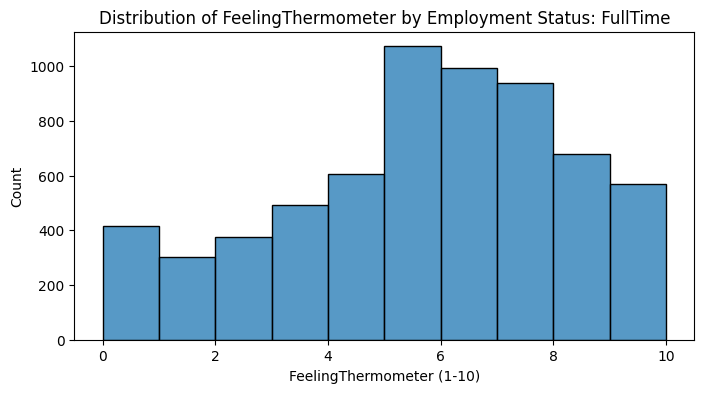

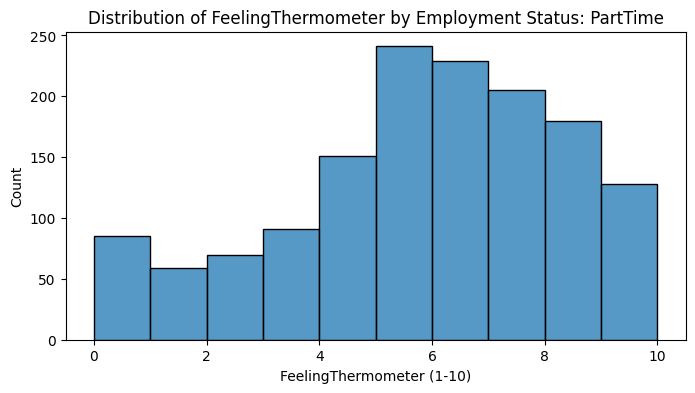

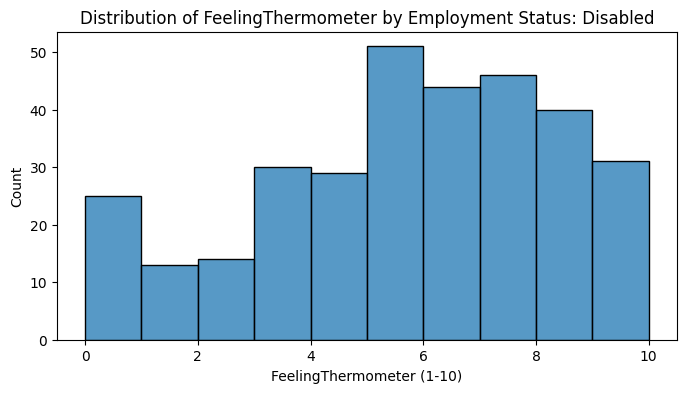

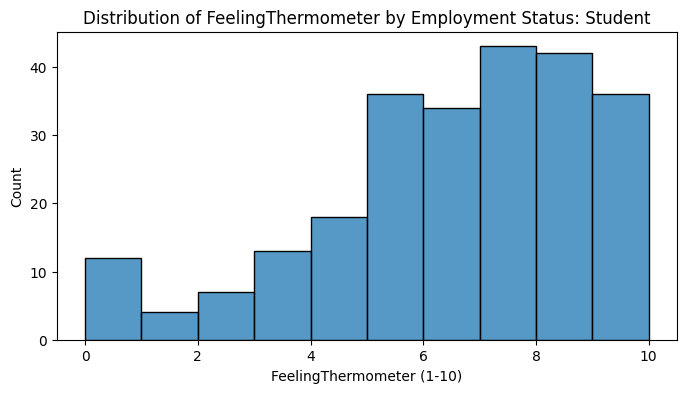

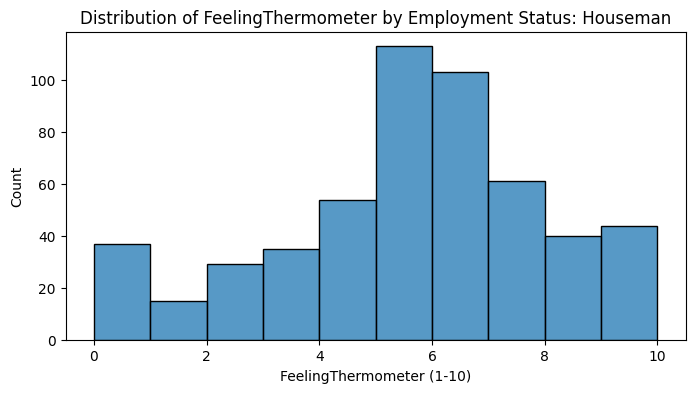

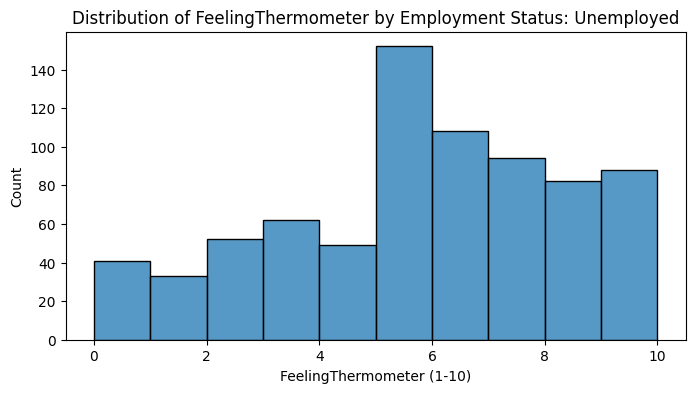

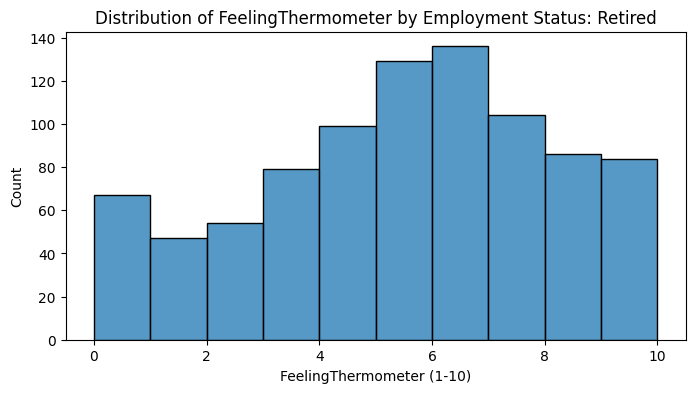

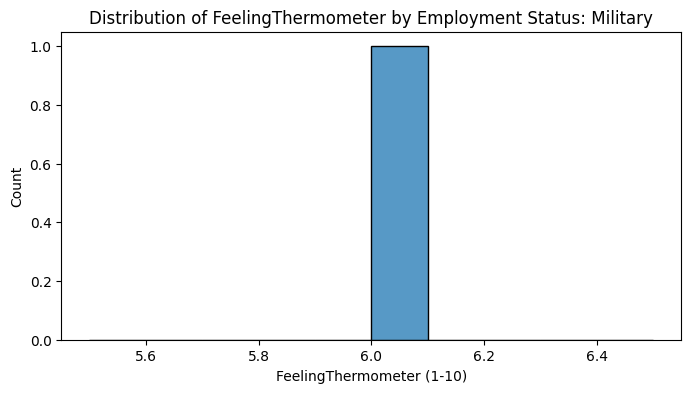

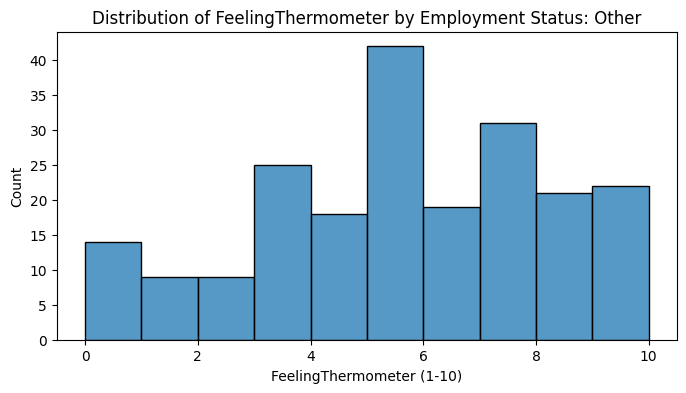

In [47]:
# Distribution of FeelingThermometer across different employment statuses
employment_status_cols = ['FullTime', 'PartTime', 'Disabled', 'Student', 'Houseman', 'Unemployed', 'Retired', 'Military', 'Other']
for col in employment_status_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=europe_df[europe_df[col] == 1], x='FeelingThermometer', bins=10)
    plt.title(f"Distribution of FeelingThermometer by Employment Status: {col}")
    plt.xlabel("FeelingThermometer (1-10)")
    plt.ylabel("Count")
    plt.show()


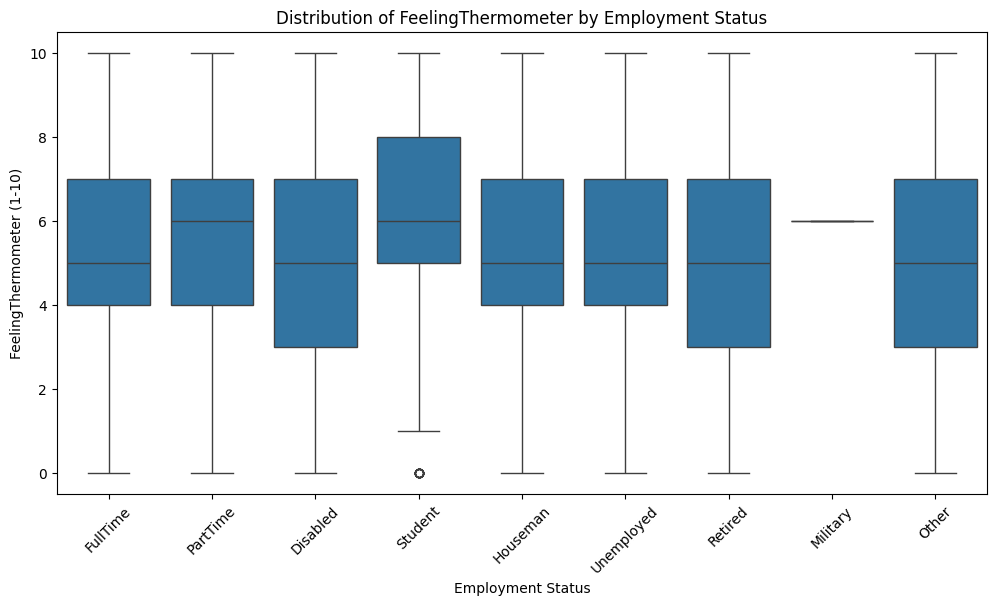

In [379]:
# Box plot of FeelingThermometer by Employment Status
plt.figure(figsize=(12, 6))
# Melt the dataframe to create a long format suitable for seaborn
employment_status_melted = europe_df.melt(id_vars=['FeelingThermometer'], value_vars=employment_status_cols, var_name='EmploymentStatus', value_name='Status')
# Filter only rows where the employment status is active (i.e., Status == 1)
employment_status_filtered = employment_status_melted[employment_status_melted['Status'] == 1]
sns.boxplot(data=employment_status_filtered, x='EmploymentStatus', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('FeelingThermometer (1-10)')
plt.xticks(rotation=45)
plt.show()

### education level

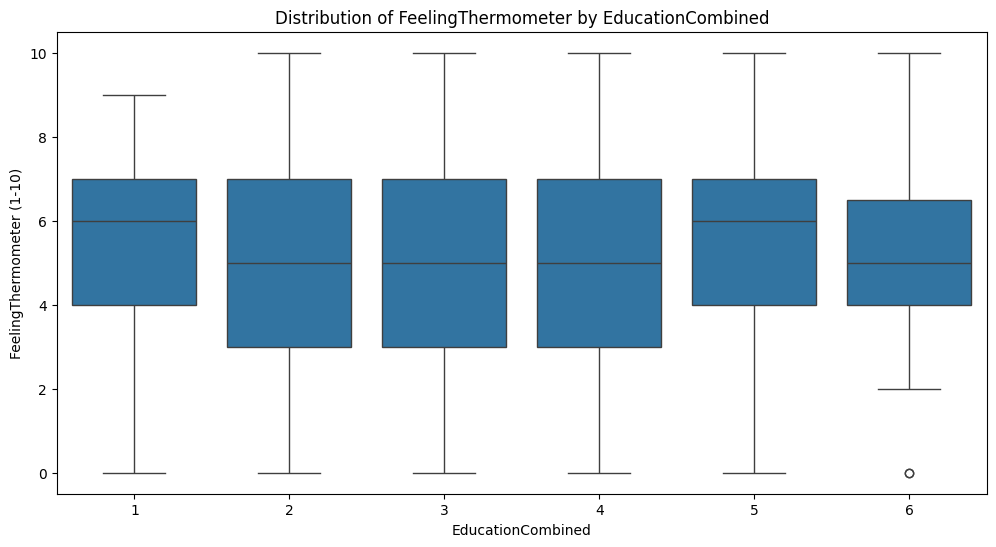

In [380]:
# Box plot of FeelingThermometer by EducationCombined
plt.figure(figsize=(12, 6))
sns.boxplot(data=europe_df, x='EducationCombined', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by EducationCombined')
plt.xlabel('EducationCombined')
plt.ylabel('FeelingThermometer (1-10)')
plt.show()

### age

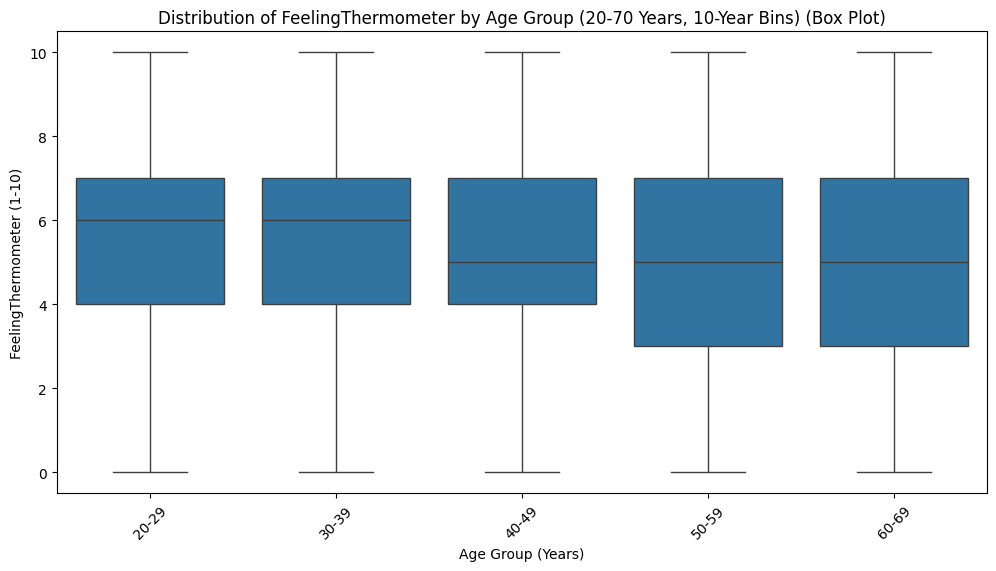

In [388]:
# Box plot of FeelingThermometer by Age (do before scaling)
europe_df['AgeGroup'] = pd.cut(europe_df['Age'], bins=np.arange(20, 80, 10), right=False, labels=[f'{i}-{i+9}' for i in range(20, 70, 10)])
plt.figure(figsize=(12, 6))
sns.boxplot(data=europe_df.dropna(subset=['AgeGroup']), x='AgeGroup', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by Age Group (20-70 Years, 10-Year Bins) (Box Plot)')
plt.xlabel('Age Group (Years)')
plt.ylabel('FeelingThermometer (1-10)')
plt.xticks(rotation=45)
plt.show()

### income

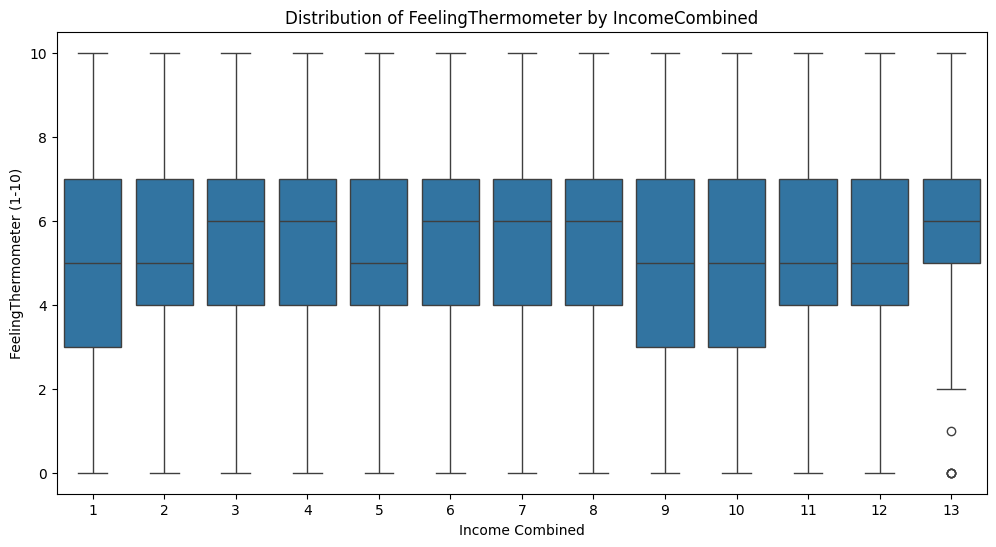

In [390]:
# Box plot of FeelingThermometer by IncomeCombined
plt.figure(figsize=(12, 6))
sns.boxplot(data=europe_df, x='IncomeCombined', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by IncomeCombined')
plt.xlabel('Income Combined')
plt.ylabel('FeelingThermometer (1-10)')
plt.show()

# Analysis

## Random Forest on SentimentBinary (classification)

In [292]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [294]:
# scaling age
scaler = StandardScaler()
europe_df[['Age']] = scaler.fit_transform(europe_df[['Age']])

In [ ]:
# random forest classifier for binary classification 
# exclude 'FeelingThermometer', 'ID', 'Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'
X_binary = europe_df.drop(columns=['SentimentBinary', 'FeelingThermometer', 'ID','Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'])
y_binary = europe_df['SentimentBinary']

In [296]:
# split test and training
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

In [297]:
# fit random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_binary, y_train_binary)

RandomForestClassifier(random_state=42)

In [ ]:
# feature importance for SentimentBinary
importances_binary = rf_classifier.feature_importances_
features_binary = X_binary.columns
indices_binary = np.argsort(importances_binary)[::-1]

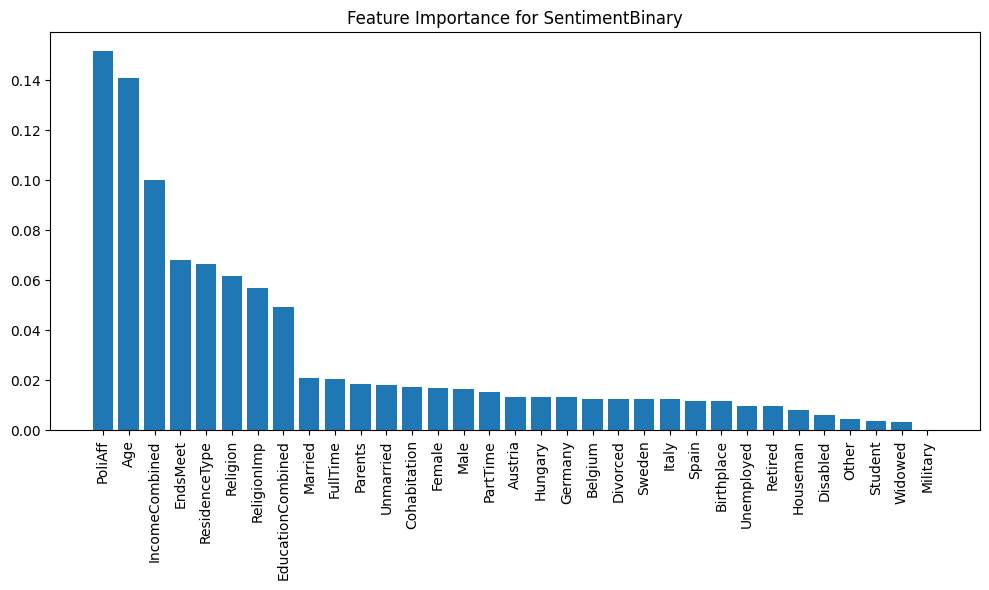

In [299]:
# plot feature importance for SentimentBinary
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for SentimentBinary")
plt.bar(range(X_binary.shape[1]), importances_binary[indices_binary], align="center")
plt.xticks(range(X_binary.shape[1]), features_binary[indices_binary], rotation=90)
plt.tight_layout()
plt.show()

### F1

In [306]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [309]:
# Make predictions
y_pred_binary = rf_classifier.predict(X_test_binary)

In [310]:
# Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


In [312]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.36      0.44       735
           1       0.71      0.85      0.78      1385

    accuracy                           0.68      2120
   macro avg       0.64      0.60      0.61      2120
weighted avg       0.66      0.68      0.66      2120



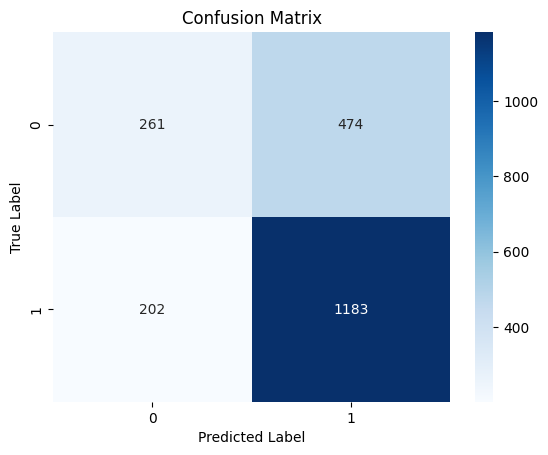

In [314]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forest on FeelingThermometer (regression)

In [301]:
# random forest regressor for ordinal
# exclude 'FeelingThermometer', 'ID', 'Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'
X_regression = europe_df.drop(columns=['SentimentBinary', 'FeelingThermometer', 'ID','Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'])
y_regression = europe_df['FeelingThermometer']

In [302]:
# split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [ ]:
# fit random forest regressor 
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [ ]:
# feature importance 
importances_regression = rf_regressor.feature_importances_
features_regression = X_regression.columns
indices_regression = np.argsort(importances_regression)[::-1]

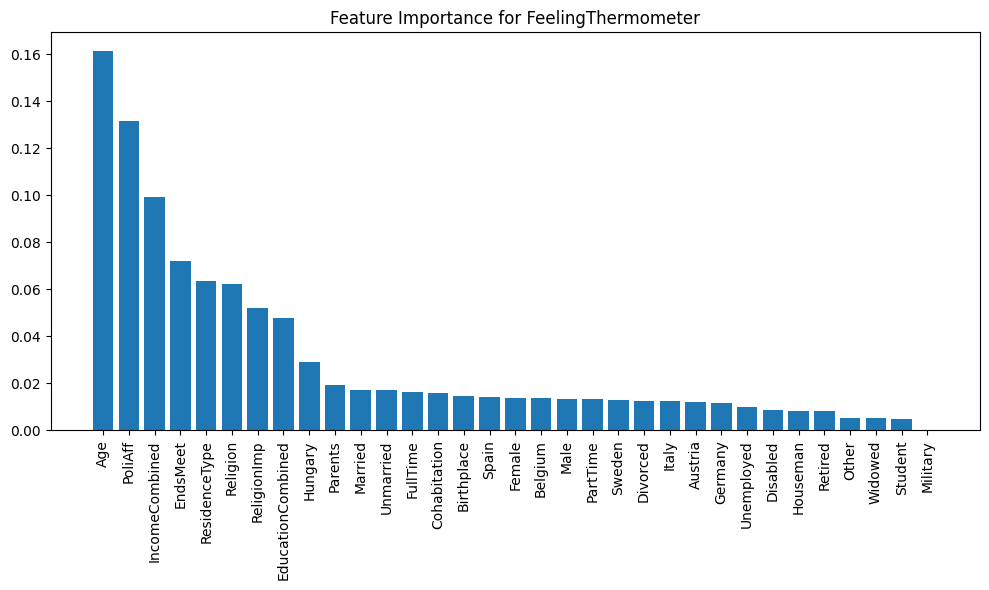

In [305]:
# plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for FeelingThermometer")
plt.bar(range(X_regression.shape[1]), importances_regression[indices_regression], align="center")
plt.xticks(range(X_regression.shape[1]), features_regression[indices_regression], rotation=90)
plt.tight_layout()
plt.show()

### Mean Absolute Error, Mean Squared Error, R² Score

In [315]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [316]:
# Make predictions for regression
y_pred_reg = rf_regressor.predict(X_test_reg)

In [317]:
# Mean Absolute Error
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 1.89


In [318]:
# Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 5.69


In [319]:
# R² Score
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² Score: {r2:.2f}")

R² Score: 0.13
